In [1]:
import cv2, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap='gray')
    plt.show()

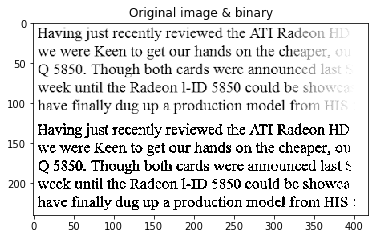

True

In [2]:
image = cv2.imread('ocr-text.png', 0)
#img_blur = cv2.GaussianBlur(image, (3,3), 0)
binary = cv2.adaptiveThreshold(image, 255,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 21, 5) 

imshow("Original image & binary", np.vstack([image, binary]))
cv2.imwrite("out.png", binary)

In [3]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

print(pytesseract.image_to_string('out.png'))

Having just recently reviewed the ATI Radeon HD
we were Keen to get our hands on the cheaper, ou
Q 5850. Though both cards were announced last $
week until the Radeon I-ID 5850 could be showca
have finally dug up a production model from HIS *


---

## Credit Card 인식

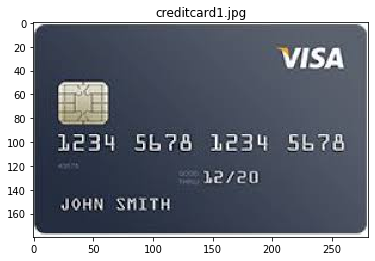

Beh el a iee e ) ira)
Dey)

JOHN SMITH


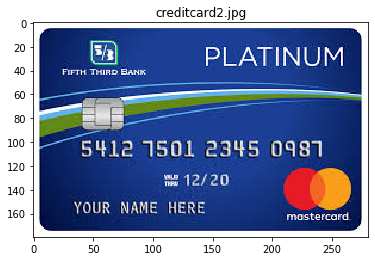

NNO)

5412 1501 2345 0987
are)
SOT Sa ea


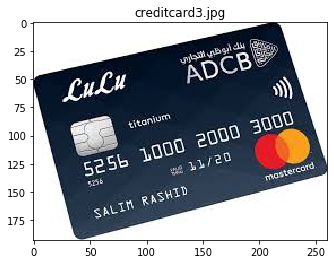

We

[NSS
Lt
ie

   

SY)


In [4]:
for i in range(3):
    str = pytesseract.image_to_string(f'creditcard{i+1}.jpg')
    img = cv2.imread(f"creditcard{i+1}.jpg")
    imshow(f"creditcard{i+1}.jpg", img)
    plt.show()
    print(str)

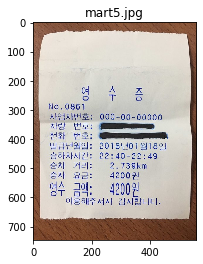

여
ㅇ
10.0861

사업지번로:

그ㅋ  1ㅎㆍ
진량. 먼오:

2:40-22:
2.7390
4200원
420(원

감사합니다.


In [5]:
str = pytesseract.image_to_string('../2020.01.09/mart5.jpg', lang='kor')
img = cv2.imread("../2020.01.09/mart5.jpg")
imshow("mart5.jpg", img)
plt.show()
print(str)

---

## 반전(flip)

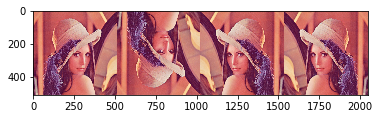

In [6]:
img = cv2.imread('../2020.01.09/lena.jpg')
img2 = cv2.flip(img,0) # 1(또는 True)은 좌우 바전, 0(또는 False)은 상하 반전입니다.
img3 = cv2.flip(img,1)
img4 = cv2.flip(img,2)
imshow("", np.hstack([img, img2, img3, img4]))


## Resizing

(512, 512, 3)


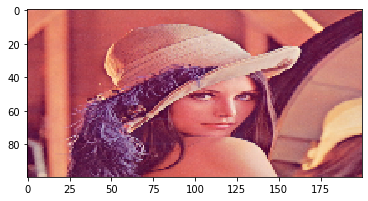

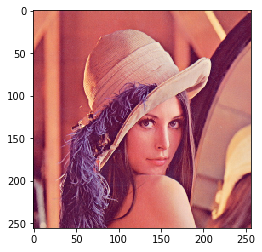

In [7]:
img = cv2.imread('../2020.01.09/lena.jpg')
print(img.shape)
zoom1 = cv2.resize(img, (200,100), interpolation=cv2.INTER_CUBIC)
# interpolation = cv2.INTER_AREA
imshow("", zoom1)
plt.show()

## 다른 방법이지만 훨씬 간결함(구체적인 사이즈를 몰라도 되기 때문에)
res = cv2.resize(img,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
imshow("", res)
plt.show()

## Cropping

(200, 290, 3)


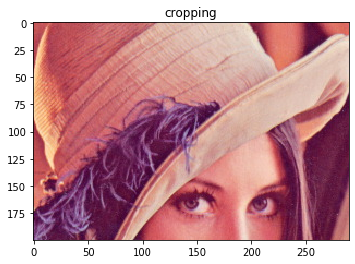

In [8]:
# 자르기(cropping)
cropping = img[100:300, 120:410]
print(cropping.shape)
imshow("cropping", cropping)

## Translation(평행 이동)

(512, 512, 3)


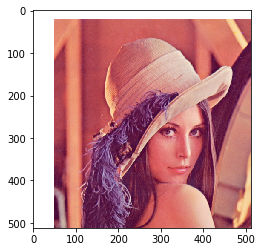

In [9]:
img = cv2.imread('../2020.01.09/lena.jpg')
print(img.shape)


# 변환 행렬, x축으로 50, Y축으로 20 이동

height,width = img.shape[:2]
M = np.float32([
    [1,0,50],  # x축
    [0,1,20]])  # y축         # y축의 양의 방향이 아래쪽이기 때문에 20처럼 양수를 넣으면 그림이 아래로 내려감
height,width = img.shape[:2]

dst = cv2.warpAffine(img, M, (width, height), borderValue=(255,255,255))  # borderValue는 그림 바깥쪽 테두리의 색을 의미


imshow("", dst)

## 연습(다양한 변환행렬)

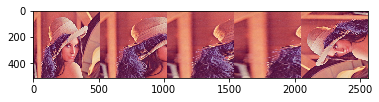

In [10]:
height,width = img.shape[:2]
M1 = np.float32([
    [1,0,0],  # x축
    [0,1,0]])  # y축         # y축의 양의 방향이 아래쪽이기 때문에 20처럼 양수를 넣으면 그림이 아래로 내려감
M2 = np.float32([
    [2,0,0],  # x축
    [0,1,0]])
M3 = np.float32([
    [3,0,0],  # x축
    [0,1,0]])
M4 = np.float32([
    [4,0,0],  # x축
    [0,1,0]])
M5 = np.float32([
    [0,1,0],  # x축
    [1,0,0]])



dst1 = cv2.warpAffine(img, M1, (width, height), borderValue=(255,255,255))  # borderValue는 그림 바깥쪽 테두리의 색을 의미
dst2 = cv2.warpAffine(img, M2, (width, height), borderValue=(255,255,255))
dst3 = cv2.warpAffine(img, M3, (width, height), borderValue=(255,255,255))
dst4 = cv2.warpAffine(img, M4, (width, height), borderValue=(255,255,255))
dst5 = cv2.warpAffine(img, M5, (width, height), borderValue=(255,255,255))

imshow("", np.hstack([dst1, dst2, dst3, dst4, dst5]))

## 거리가 10 이내로 이동하는 변환 5개 만들기

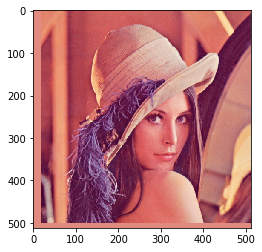

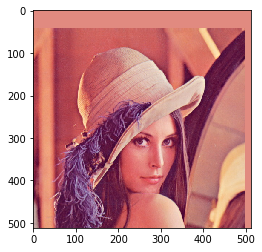

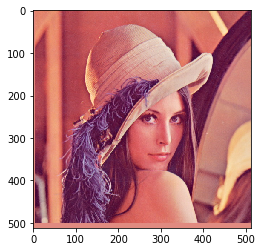

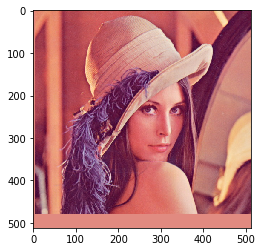

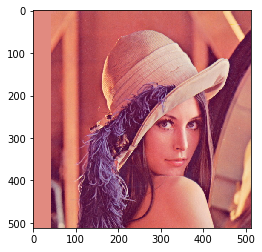

In [11]:
img = cv2.imread('../2020.01.09/lena.jpg')
height, width = img.shape[:2]

dx = 50
r = np.random.randint(dx*2, size=(5,2))-dx

M = np.float32([
    [1,0,0],
    [0,1,0]])

c = img[0,0]

for p in r.tolist():
    M[:,2] = p
    dst = cv2.warpAffine( img, M, (width, height), 
                         borderValue = (int(c[0]), int(c[1]), int(c[2])))
    imshow("", dst)

## Rotation

(512, 512, 3)
[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]
(512, 512, 3)


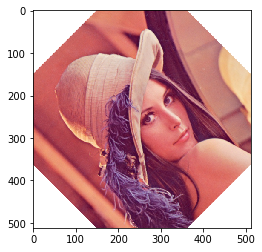

In [12]:
height, width = img.shape[:2]  # 회전 중심
print(img.shape)
img_center = (width/2, height/2)

M = cv2.getRotationMatrix2D(img_center, 45, 1.0) # 45 : 회전각,   1.0 : Scalefator
print(M)
rotated_image = cv2.warpAffine(img, M, (width, height), borderValue = (255,255,255) )

print(rotated_image.shape)
imshow("", rotated_image)

In [13]:
img = cv2.imread('../2020.01.09/lena.jpg')
height, width = img.shape[:2]  # 회전 중심
print(img.shape)
img_center = (width/2, height/2)
angle1 = range(181)
angle2 = range(181, 361, 1)

for i in angle1:
    M = cv2.getRotationMatrix2D(img_center, i, (180-i)/180 )
    rotated_image = cv2.warpAffine(img, M, (width, height), borderValue = (i,i,i) )
    cv2.imwrite(f"g{i}.jpg", rotated_image)

for i in angle2:
    M = cv2.getRotationMatrix2D(img_center, i, (i-180)/180 )
    rotated_image = cv2.warpAffine(img, M, (width, height), borderValue = (i-180,i-180,i-180) )
    cv2.imwrite(f"g{i}.jpg", rotated_image)
    
    


from PIL import Image

im = Image.open('g0.jpg')
app = []

im.save("out2.gif", save_all=True, 
        append_images=[Image.open(f"g{i}.jpg") for i in range(1,361)],
        duration=0.00000000001, loop=0)



# for i in range(1,361):
#     im_ = Image.open(f"g{i}.jpg") 
#     app = app.append(im_)


# im.save("out2.gif", save_all=True, 
#         append_images = [ im{i} for i in range(1,361) ],
#        duration=500, loop=0)

# im2 = Image.open('g2.jpg')
# im3 = Image.open('g3.jpg')
# im4 = Image.open('g4.jpg')

# im1.save("out.gif", save_all=True, append_images=[im2, im3, im4],
#         duration=500, loop=0)


(512, 512, 3)


<img src=out2.gif?3443>

---

In [14]:
img = cv2.imread('../2020.01.09/namecard.png')

height, width = img.shape[:2]

# 좌표순서 : 상단 왼쪽 끝, 상단 오른쪽 끝, 하단 왼쪽 끝, 하단 오른쪽 끝
point_list = [[27, 179], [611,36], [118, 534], [754,325]]

pts1 = np.float32([list(point_list[0]),
                  list(point_list[1]),
                  list(point_list[2]),
                  list(point_list[3])])
print(pts1)

[[ 27. 179.]
 [611.  36.]
 [118. 534.]
 [754. 325.]]


In [15]:
# pts2의 역할 : {img영상에서 pts1로 둘러쌓인 Image}의 바뀐 영상에서의 위치

pts2 = np.float32([[0,0],[width, 0], [0,int(height/2)], [int(width/2), int(height/2)]])
M = cv2.getPerspectiveTransform(pts1,pts2)

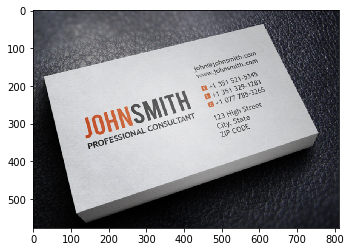

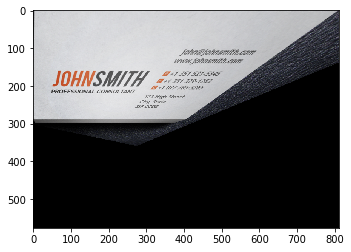

In [16]:
# img_result = cv2.warpPerspective(img,M,(a, b)) 여기에서 a, b는 출력할 이미지의 사이즈

img_result = cv2.warpPerspective(img,M,(width, height))
imshow("", img)
imshow("", img_result)

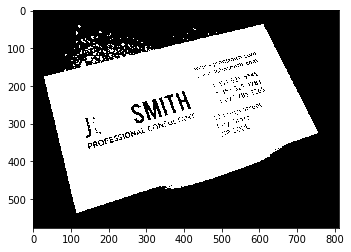

In [17]:
img = cv2.imread('../2020.01.09/namecard.png', 0)
img_blur = cv2.GaussianBlur(img, (3,3), 0)
_, binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("", binary)

---

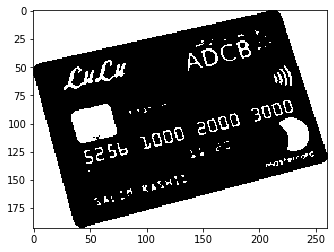

In [18]:
img = cv2.imread('creditcard3.jpg', 0)
img_blur = cv2.GaussianBlur(img, (3,3), 0)
_, binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("", binary)


In [36]:
bbb = []

def unpacking(x):
    [ bbb.append(x[i][0]) for i in range(len(x)) ]
    
a = [[[1,2]], [[3,4]]] 

unpacking(a)
print(bbb)



[[1, 2], [3, 4]]


In [61]:
x1 = []
a =1
b =2
x1.append(a)
x1.append

[1]

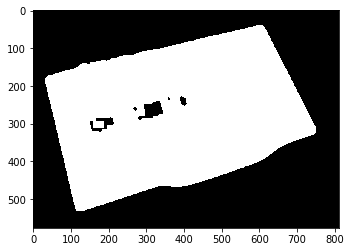

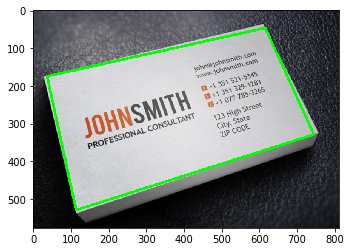

[[615, 47], [37, 175], [114, 529], [744, 329]]
[[37, 175], [114, 529], [615, 47], [744, 329]]


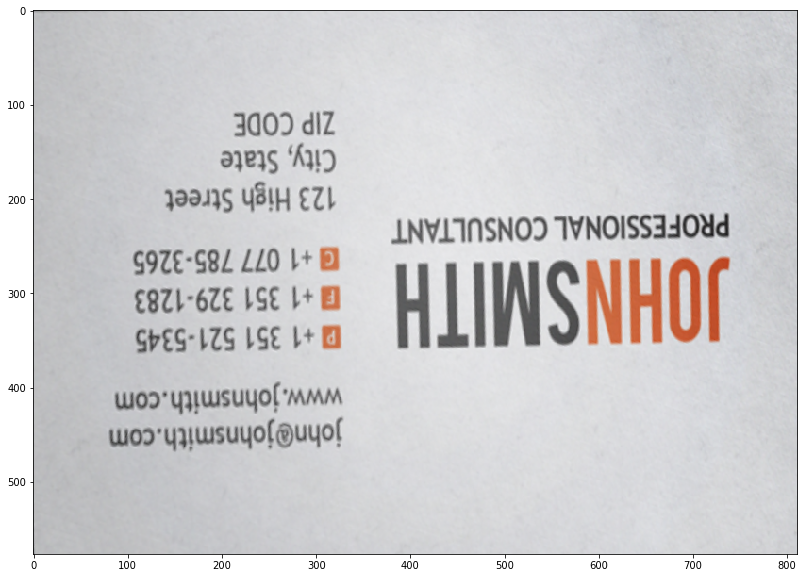

In [77]:
img = cv2.imread('../2020.01.15/namecard.png')
img_copy = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.medianBlur(gray, 21)
_, binary = cv2.threshold(img_blur, 80, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
kernel = np.ones((3,3), np.uint8)
 

opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=7)
imshow("", opening)
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #RETR_EXTERNAL:외곽만
 
# print(len(contours))
 
length = cv2.arcLength(contours[0], True)  #도형 윤곽 길이, 폐곡선 여부 True
approx = cv2.approxPolyDP(contours[0], 0.02 * length, True) #얼마나 꺾이는지 확인, 꼭지점 위치
recta = cv2.drawContours(img_copy, [approx], -1, (0,255,0),5)

imshow("", recta)

# imshow('', img_blur)
# imshow('', binary)
# imshow('', opening)
# imshow('', img_copy)
 
height, width = img.shape[:2]
point_list = approx

# ass=point_list.ravel()
# print(ass)
# ass.pop(0,1)
# x1 = []
# x2 = []
# y1 = []
# y2 = []
# test = [x1, x2, y1, y2]
# for i in range(len(ass)):
#     append(ass.pop(0))
    
bbb = []

def unpacking(x):
    [ bbb.append(x[i][0]) for i in range(len(x)) ]

unpacking((point_list).tolist())
print(bbb)
 
    
def Sort(sub_li): 
    sub_li.sort(key = lambda x: x[0]) 
    return sub_li 

print(Sort(bbb))


pts1 = np.float32([list(point_list[0]),
                    list(point_list[1]),
                    list(point_list[2]),
                    list(point_list[3])])
 
# print(pts1)
pts2 = np.float32([[0,height], [width,height], [width,0], [0,0]])
# print(pts2)
M = cv2.getPerspectiveTransform(pts1, pts2)
# print(M)
img_result = cv2.warpPerspective(img, M, (width, height))
# _, binary = cv2.threshold(img_result, 230, 255, cv2.THRESH_BINARY)
cv2.imwrite("namecard2.jpg", img_result)

fig=plt.figure(figsize=(20,10))
imshow('', img_result)

In [ ]:
[[1,2]]